In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Load the MNIST library which is part of Keras.  MNIST stands for Modified National Institute of Technology. https://en.wikipedia.org/wiki/MNIST_database. It is a collection of 60,000 training and 10,000 test images of the digits 0-9. https://keras.io/datasets/. Previously we gained about 98% accuracy in the model.  This time we will introduce convolutional neural networks (convets, or CNN) and see if we can improve the model. 

In [1]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend, models, layers, regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

TensorFlow 2.x selected.


In [2]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images =  train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/train_images.max()

test_images =  test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/test_images.max()

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)

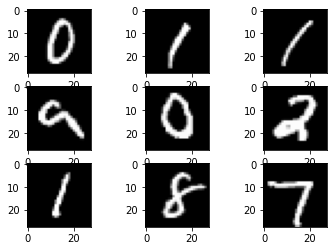

In [7]:
for i in range(0, 9):
    plt.subplot(3, 3, + 1 + i)
    plt.imshow(x_train[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 8s 169us/sample - loss: 0.1894 - accuracy: 0.9408 - val_loss: 0.0605 - val_accuracy: 0.9817
Epoch 2/50
45000/45000 [==============================] - 7s 157us/sample - loss: 0.0807 - accuracy: 0.9755 - val_loss: 0.0413 - val_accuracy: 0.9877
Epoch 3/50
45000/45000 [==============================] - 7s 160us/sample - loss: 0.0593 - accuracy: 0.9823 - val_loss: 0.0445 - val_accuracy: 0.9867
Epoch 4/50
45000/45000 [==============================] - 7s 158us/sample - loss: 0.0550 - accuracy: 0.9830 - val_loss: 0.0355 - val_accuracy: 0.9897
Epoch 5/50
45000/45000 [==============================] - 7s 155us/sample - loss: 0.0465 - accuracy: 0.9861 - val_loss: 0.0389 - val_accuracy: 0.9886
Epoch 6/50
45000/45000 [==============================] - 7s 159us/sample - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.0430 - val_accuracy: 0.9887
Epoch 7/50
45000/45000 [==========================

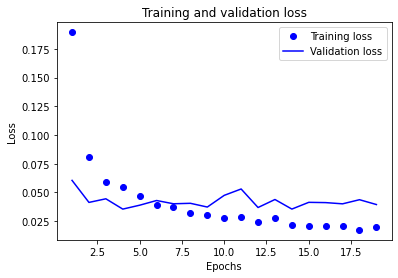

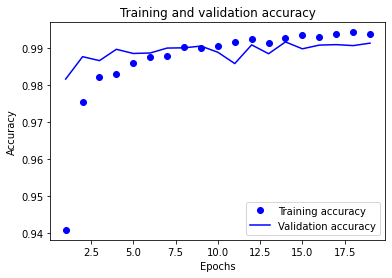

10000/10000 [==============================] - 1s 83us/sample - loss: 0.0263 - accuracy: 0.9930
test_acc: 0.993


In [12]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit(x_train, 
          y_train, 
          epochs = 50, 
          batch_size = 32,  
          validation_data=(x_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)